In [1]:
%matplotlib inline

In [2]:
import constantRunner
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [3]:
plt.rcParams["figure.figsize"] = (16, 5)

In [4]:
# Constants
BETAS = [0.5, 1, 1.5, 2, 2.5, 3]
ALPHAS = [0.5, 1, 1.5, 2, 3, 4, 5]
A_AND_B = [(a, b) for a in ALPHAS for b in BETAS]
N = 100
T_FACTOR = 500
MEASURE_STEP = 0
RUN_COUNT = 128
THREAD_COUNT = 4

In [5]:
measures = [constantRunner.constantRunner(beta, alpha, N, T_FACTOR, MEASURE_STEP, RUN_COUNT, THREAD_COUNT) for alpha, beta in tqdm(A_AND_B)]

100%|██████████| 42/42 [08:20<00:00, 11.92s/it]


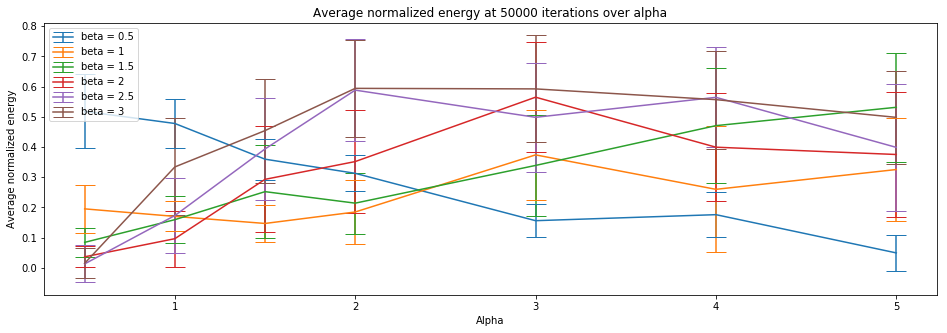

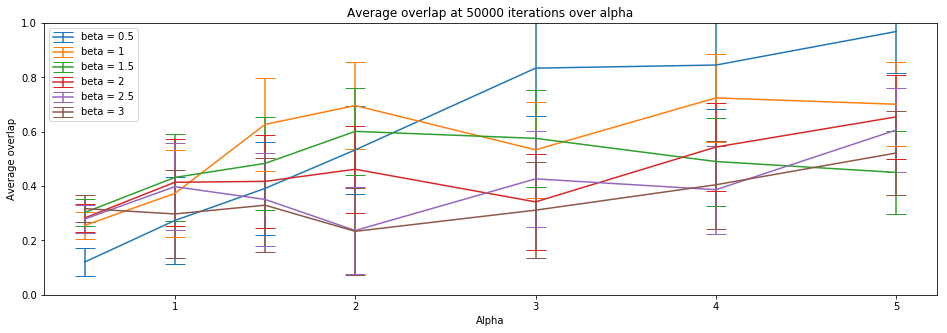

In [6]:
# Plot
for betaOffset in range(len(BETAS)):
    normalizedEnergysForBeta = np.zeros(len(ALPHAS))
    stdNormalizedEnergysForBeta = np.zeros(len(ALPHAS))

    for i in range(len(ALPHAS)):
        index = i * len(BETAS) + betaOffset
        eMeasuresForAlpha, tmp = measures[index]
        averageEMeasuresForAlpha = np.mean(eMeasuresForAlpha, axis=1)
        stdEMeasuresForAlpha = np.std(eMeasuresForAlpha, axis=1)
        normalizedEnergysForBeta[i] = averageEMeasuresForAlpha[-1];
        stdNormalizedEnergysForBeta[i] = stdEMeasuresForAlpha[-1];
        
    plt.errorbar(ALPHAS, normalizedEnergysForBeta, yerr=stdNormalizedEnergysForBeta, label='beta = ' + str(BETAS[betaOffset]), capsize=10)
plt.title('Average normalized energy at ' + str(T_FACTOR * N) + ' iterations over alpha')
plt.legend(loc='best')
plt.xlabel('Alpha')
plt.ylabel('Average normalized energy')
plt.show()

    
# Plot
for betaOffset in range(len(BETAS)):
    overlapsForBeta = np.zeros(len(ALPHAS))
    stdOverlapsForBeta =  np.zeros(len(ALPHAS))
    
    for i in range(len(ALPHAS)):
        index = i * len(BETAS) + betaOffset
        tmp, overlapMeasuresForAlpha = measures[index]
        averageOverlapForAlpha = np.mean(overlapMeasuresForAlpha, axis=1)
        stdOverlapsForAlpha = np.std(eMeasuresForAlpha, axis=1)
        overlapsForBeta[i] = averageOverlapForAlpha[-1]
        stdOverlapsForBeta[i] = stdOverlapsForAlpha[-1]
        
    plt.errorbar(ALPHAS, overlapsForBeta, yerr=stdNormalizedEnergysForBeta, label='beta = ' + str(BETAS[betaOffset]), capsize=10)
plt.ylim(ymin=0, ymax=1)
plt.legend(loc='best')
plt.title('Average overlap at ' + str(T_FACTOR * N) + ' iterations over alpha')
plt.xlabel('Alpha')
plt.ylabel('Average overlap')

plt.show()